In [1]:
import xtrack as xt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

In [2]:
collider = xt.Multiline.from_json("/afs/cern.ch/work/c/cdroin/private/DA_IPAC_2024/studies/scans/collider_start_of_collapse_round/base_collider/collider/collider.json")
collider.build_trackers()

nemitt_x = 2.3e-06
nemitt_y = 2.3e-06

Loading line from dict: 100%|██████████| 43150/43150 [00:02<00:00, 16886.75it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 43202/43202 [00:02<00:00, 16238.73it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 43150/43150 [00:02<00:00, 18643.44it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 43202/43202 [00:02<00:00, 18425.16it/s]


Done loading line from dict.           


Xcoll not installed, skipping collimator elements


Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [3]:
initial_x = [0,1,0,1,2,0,2,2,1]
initial_y =[0,0,1,1,0,2,2,1,2]

particles = collider['lhcb1'].build_particles(
    x_norm=initial_x,
    y_norm=initial_y,
    delta=27.e-5,
    nemitt_x = nemitt_x, 
    nemitt_y = nemitt_y,
)

particles_init = particles.copy()

In [4]:
def plot_initial_distribution(collider, particles):
    
    # Compute twiss
    tw = collider['lhcb1'].twiss()

    # Use twiss to compute normalized coordinates
    norm_coord = tw.get_normalized_coordinates(particles, nemitt_x=nemitt_x, nemitt_y=nemitt_y)

    # Extract normalized coordinates
    x = norm_coord.x_norm
    y = norm_coord.y_norm
    px = norm_coord.px_norm
    py = norm_coord.py_norm
    
    # Plot
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].scatter(x, px, c='b')
    ax[0].set_xlabel('x [m]')
    ax[0].set_ylabel('px [rad]')
    ax[0].set_xlim(-3,3)
    ax[0].set_ylim(-3,3)
    ax[0].set_title('x-px phase space')
    ax[0].grid()
    ax[1].scatter(y, py, c='r')
    ax[1].set_xlabel('y [m]')
    ax[1].set_ylabel('py [rad]')
    ax[1].set_xlim(-3,3)
    ax[1].set_ylim(-3,3)
    ax[1].set_title('y-py phase space')
    ax[1].grid()
    ax[2].scatter(x, y, c='g')
    ax[2].set_xlabel('x [m]')
    ax[2].set_ylabel('y [m]')
    ax[2].set_xlim(-3,3)
    ax[2].set_ylim(-3,3)
    ax[2].set_title('x-y phase space')
    ax[2].grid()
    plt.show()
    

In [5]:
def plot_last_turns(collider, l_particles):
    
    # Compute twiss
    tw = collider['lhcb1'].twiss()

    l_x = []
    l_y = []
    l_px = []
    l_py = []
    for particles in l_particles:
        # Use twiss to compute normalized coordinates
        norm_coord = tw.get_normalized_coordinates(particles, nemitt_x=nemitt_x, nemitt_y=nemitt_y)
        l_x.append(norm_coord.x_norm)
        l_y.append(norm_coord.y_norm)
        l_px.append(norm_coord.px_norm)
        l_py.append(norm_coord.py_norm)


    # Plot with evolving color for each turn (i), and decreasing alpha for each particle
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    for i in range(len(l_x)):
        ax[0].scatter(l_x[i], l_px[i], c='b', alpha=1/(len(l_x)-i))
        ax[1].scatter(l_y[i], l_py[i], c='r', alpha=1/(len(l_x)-i))
        ax[2].scatter(l_x[i], l_y[i], c='g', alpha=1/(len(l_x)-i))
    ax[0].set_xlabel('x [m]')
    ax[0].set_ylabel('px [rad]')
    ax[0].set_xlim(-3,3)
    ax[0].set_ylim(-3,3)
    ax[0].set_title('x-px phase space')
    ax[0].grid()
    ax[1].set_xlabel('y [m]')
    ax[1].set_ylabel('py [rad]')
    ax[1].set_xlim(-3,3)
    ax[1].set_ylim(-3,3)
    ax[1].set_title('y-py phase space')
    ax[1].grid()
    ax[2].set_xlabel('x [m]')
    ax[2].set_ylabel('y [m]')
    ax[2].set_xlim(-3,3)
    ax[2].set_ylim(-3,3)
    ax[2].set_title('x-y phase space')
    ax[2].grid()
    plt.show()

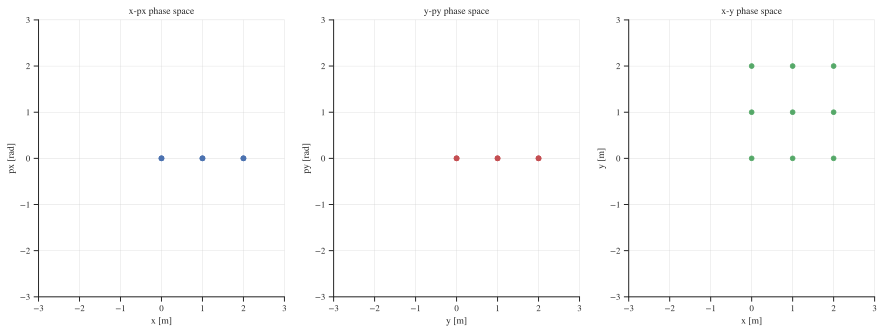

In [6]:
# Plot initial distribution
plot_initial_distribution(collider, particles)

In [7]:
# Track for a 10 turns
n = 30
l_particles = []
for i in range(n):
    if i%3==0:
        l_particles.append(particles.copy())
    collider["lhcb1"].track(particles, turn_by_turn_monitor=False, num_turns=1)

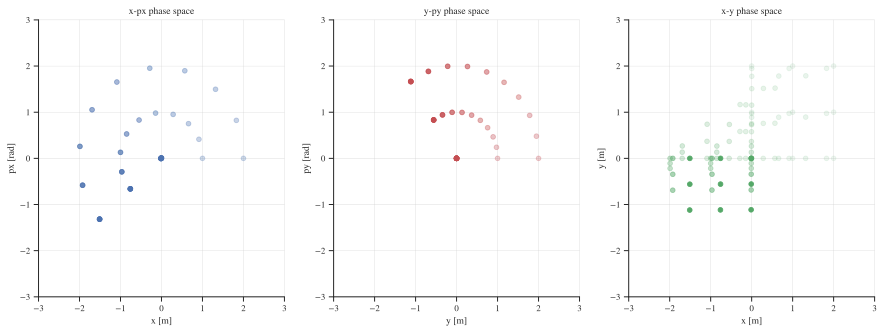

In [8]:
# Plot final distribution
plot_last_turns(collider, l_particles)

### Same experiment with flat optics

Loading line from dict: 100%|██████████| 43150/43150 [00:03<00:00, 12350.46it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 43202/43202 [00:02<00:00, 18069.27it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 43150/43150 [00:03<00:00, 11702.04it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 43202/43202 [00:02<00:00, 17996.03it/s]


Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


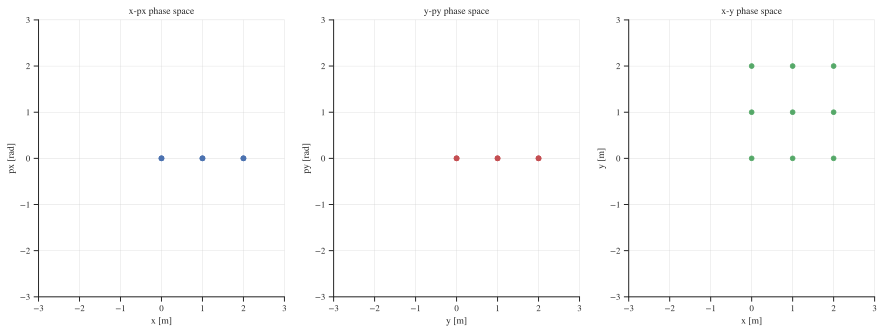

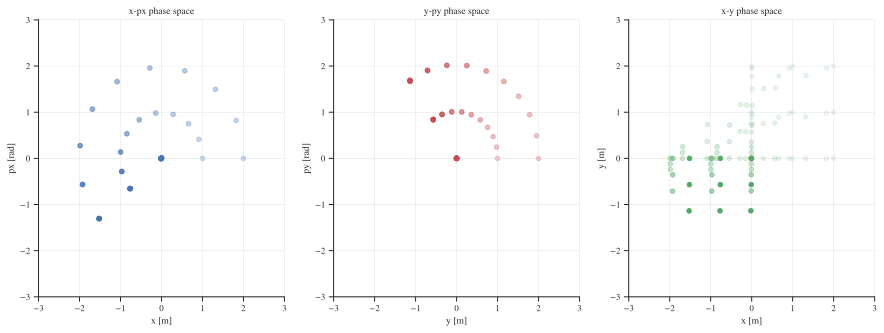

In [9]:
collider = xt.Multiline.from_json("/afs/cern.ch/work/c/cdroin/private/DA_IPAC_2024/studies/scans/collider_start_of_collapse_flat_same_oct/base_collider/collider/collider.json")
collider.build_trackers()

particles = particles_init.copy()

# Plot initial distribution
plot_initial_distribution(collider, particles)

# Track for a thousand turns
l_particles = []
for i in range(n):
    if i%3==0:
        l_particles.append(particles.copy())
    collider["lhcb1"].track(particles, turn_by_turn_monitor=False, num_turns=1)

# Plot final distribution
plot_last_turns(collider, l_particles)